# INTUITION

In [52]:
import math 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [53]:
def f(x):
    return 3*x**2 - 4*x + 5

In [54]:
f(3.0)

20.0

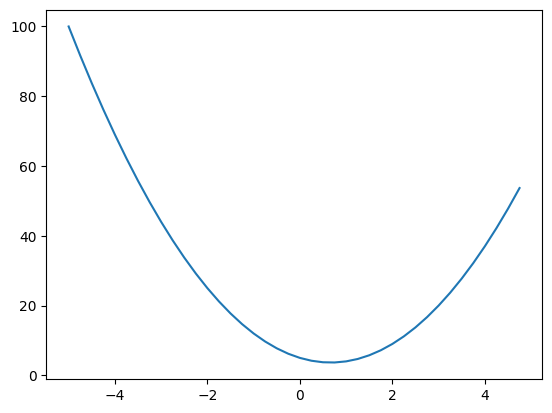

In [55]:
xs = np.arange(-5,5,0.25)
ys = f(xs)

plot=plt.plot(xs,ys)


# DERIVATIVE OF FUNCTION

In [56]:
h=0.0001
x=3.0
dfdx = ((f(x+h)-f(x))/h)
print(dfdx)

14.000300000063248


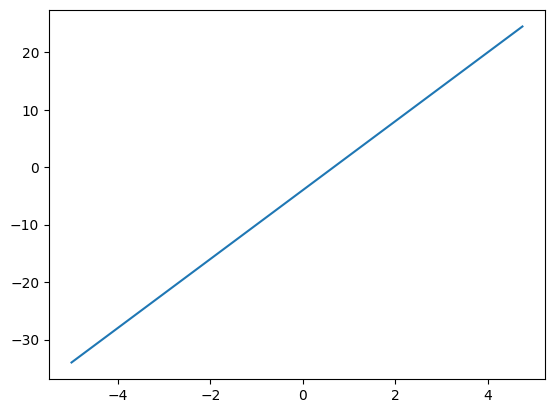

In [57]:
def slope(x,h=0.0001):
    return ((f(x+h)-f(x))/h)


xs = np.arange(-5,5,0.25)
ys = slope(xs)

plot=plt.plot(xs,ys)

In [58]:
class Value:

    def __init__(self,data, _children=(), _op='',label=''):
        self.data:float = data
        self.grad:float = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label


    def __repr__(self):
        return f"Value(data={self.data})"
    def get_node_label(self):
            return "{" + f"{self.label}={self.data} | grad={self.grad}" + "}"
    def __add__(self,other):
        return Value(self.data + other.data, {self,other}, _op='+')
    def __mul__(self,other):
        return Value(self.data * other.data, {self,other}, _op='*')
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        return out

a = Value(2.0,label='a')
b = Value(-3.0,label='b')
c = Value(10.0,label='c')
e=a*b; e.label = 'e'
d=e+c; d.label = 'd'
f= Value(-2.0,label='f')
L = d*f; L.label = 'L'

L


Value(data=-8.0)

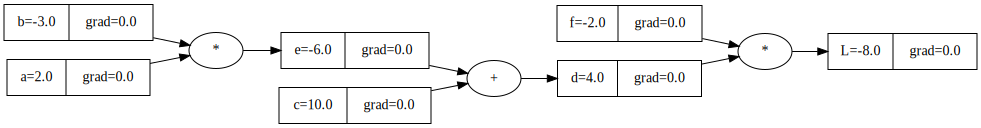

In [59]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph. Runs a DFS from the answer to all the components
  # that contributed to it.
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  nodes, edges = trace(root)
  
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    #dot.node(name = uid, label = "{ %s | data %.4f |  }" % ( n.label ,n.data), shape='record')
    dot.node(name = uid, label = n.get_node_label(), shape='record')

    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot


draw_dot(L)

In [60]:
def lol():
    h=0.0001

    a = Value(2.0,label='a')
    b = Value(-3.0,label='b')
    c = Value(10.0,label='c')
    e=a*b; e.label = 'e'
    d=e+c; d.label = 'd'
    f= Value(-2.0,label='f')
    L1 = d*f; L.label = 'L'

    a = Value(2.0+h,label='a')
    b = Value(-3.0,label='b')
    c = Value(10.0,label='c')
    e=a*b; e.label = 'e'
    d=e+c; d.label = 'd'
    f= Value(-2.0,label='f')
    L2 = d*f; L.label = 'L'

    print(f"Derivative for a is {(L2.data-L1.data)/h}")

lol()

Derivative for a is 6.000000000021544


L = d*f 

dL/dd = f 




In [62]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'



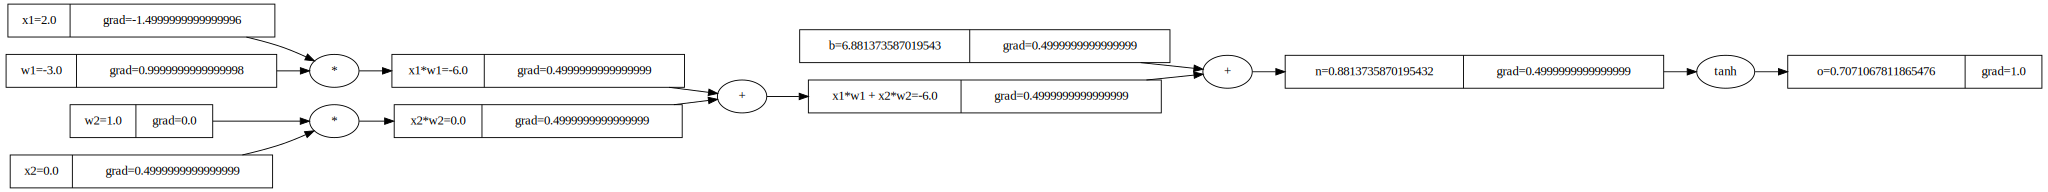

In [78]:
draw_dot(o)

# MANUAL GRADIENT DESCENT

In [77]:
o.grad = 1.0 
# o = tanh(n)
# dO/dn = 1.0 - tanh(n)**2 = 1 - o**2 
n.grad = (1.0  - o.data**2)
# dN/w1 = x1
# need to leverage chain rule here to find dO/dw1

# dO/db = dO/Dn * dN/db =
b.grad = 1* n.grad
# dO/x1w1x2w2 
x1w1x2w2.grad = 1 * n.grad

x1w1.grad = 1*x1w1x2w2.grad
x2w2.grad = 1*x1w1x2w2.grad

w1.grad =  x1.data * n.grad
w2.grad = x2.data * n.grad 
x1.grad = w1.data * x1w1.grad
x2.grad = w2.data * x2w2.grad
